In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [4]:
#read in df with flatline data
dpw_df = pd.read_csv("data/NO2_DPW_withFlatline.csv")
pema_df = pd.read_csv("data/NO2_PEMA_withFlatline.csv")
pha_df = pd.read_csv("data/NO2_PHA_withFlatline.csv")

In [5]:
#dpw dataframe cleanup
dpw_df.rename(columns={"datetime": "datetime_utc"}, inplace=True)
dpw_df["datetime_utc"] = pd.to_datetime(dpw_df["datetime_utc"]).dt.floor("min")
columns_to_drop = ["timestamp", "id", "timestamp_local", "sn", "device_state", "pm1_model_id","pm25_model_id","pm10_model_id","co_model_id","no_model_id","no2_model_id","o3_model_id"]
dpw_df.drop(columns=columns_to_drop)
new_order = ["datetime_utc", "date_utc", "time_utc", "date_est", "time_est", "rh","temp","lat","lon","pm1","pm25","pm10","co","no","no2","o3", "no2_rolling_std", "flatline_flag"]
dpw_df = dpw_df[new_order]
dpw_df.head()

,datetime_utc,date_utc,time_utc,date_est,time_est,rh,temp,lat,lon,pm1,pm25,pm10,co,no,no2,o3,no2_rolling_std,flatline_flag
0,2025-04-30 23:59:00,2025-04-30,23:59:53,2025-04-30,19:59:53,19.2,21.4,41.79521,-71.39783,2.267,2.606,13.212,731.550,2.188,7.695,54.545,NaN,False
1,2025-04-30 23:58:00,2025-04-30,23:58:53,2025-04-30,19:58:53,19.4,21.5,41.79521,-71.39783,1.927,2.227,2.461,742.599,1.996,7.744,53.284,NaN,False
2,2025-04-30 23:57:00,2025-04-30,23:57:53,2025-04-30,19:57:53,18.7,21.5,41.79521,-71.39783,2.103,2.528,8.526,763.211,2.191,8.391,51.882,NaN,False
3,2025-04-30 23:56:00,2025-04-30,23:56:53,2025-04-30,19:56:53,17.7,21.6,41.79521,-71.39783,0.985,1.174,7.518,773.882,2.259,7.459,53.250,NaN,False
4,2025-04-30 23:55:00,2025-04-30,23:55:53,2025-04-30,19:55:53,17.3,21.6,41.79521,-71.39783,1.385,1.791,3.087,788.944,2.258,7.971,53.545,0.351939,False


In [6]:
#pema dataframe cleaning
pema_df.rename(columns={"datetime": "datetime_utc"}, inplace=True)
pema_df["datetime_utc"] = pd.to_datetime(pema_df["datetime_utc"]).dt.floor("min")
columns_to_drop = ["timestamp", "id", "timestamp_local", "sn", "device_state", "pm1_model_id","pm25_model_id","pm10_model_id","co_model_id","no_model_id","no2_model_id","o3_model_id"]
pema_df.drop(columns=columns_to_drop)
new_order = ["datetime_utc", "date_utc", "time_utc", "date_est", "time_est", "rh","temp","wd","ws","ws_scalar","lat","lon","pm1","pm25","pm10","co","no","no2","o3", "no2_rolling_std", "flatline_flag"]
pema_df = pema_df[new_order]
pema_df.head()

,datetime_utc,date_utc,time_utc,date_est,time_est,rh,temp,wd,ws,ws_scalar,...,lon,pm1,pm25,pm10,co,no,no2,o3,no2_rolling_std,flatline_flag
0,2025-04-30 23:59:00,2025-04-30,23:59:17,2025-04-30,19:59:17,20.1,20.7,20.2,3.29,3.41,...,-71.4198,0.554,0.764,11.736,786.189,1.994,8.464,53.604,NaN,False
1,2025-04-30 23:58:00,2025-04-30,23:58:17,2025-04-30,19:58:17,19.8,20.8,19.7,5.46,5.55,...,-71.4198,0.769,0.947,1.686,791.436,1.994,8.370,52.890,NaN,False
2,2025-04-30 23:57:00,2025-04-30,23:57:17,2025-04-30,19:57:17,20.1,20.9,13.4,3.23,3.60,...,-71.4198,0.477,0.752,1.671,792.563,1.932,8.484,52.609,NaN,False
3,2025-04-30 23:56:00,2025-04-30,23:56:17,2025-04-30,19:56:17,20.1,20.9,22.0,4.75,4.84,...,-71.4198,0.437,0.770,8.179,794.205,1.994,8.438,52.861,NaN,False
4,2025-04-30 23:55:00,2025-04-30,23:55:17,2025-04-30,19:55:17,20.3,21.0,28.5,3.16,3.19,...,-71.4198,0.503,0.622,1.456,807.307,1.994,8.555,51.585,0.067411,False


In [7]:
#pema dataframe cleaning
pha_df.rename(columns={"datetime": "datetime_utc"}, inplace=True)
pha_df["datetime_utc"] = pd.to_datetime(pha_df["datetime_utc"]).dt.floor("min")
columns_to_drop = ["timestamp", "id", "timestamp_local", "sn", "device_state", "pm1_model_id","pm25_model_id","pm10_model_id","co_model_id","no_model_id","no2_model_id","o3_model_id"]
pha_df.drop(columns=columns_to_drop)
new_order = ["datetime_utc", "date_utc", "time_utc", "date_est", "time_est", "rh","temp","wd","ws","ws_scalar","lat","lon","pm1","pm25","pm10","co","no","no2","o3", "no2_rolling_std", "flatline_flag"]
pha_df = pha_df[new_order]
pha_df.head()

,datetime_utc,date_utc,time_utc,date_est,time_est,rh,temp,wd,ws,ws_scalar,...,lon,pm1,pm25,pm10,co,no,no2,o3,no2_rolling_std,flatline_flag
0,2025-04-30 23:59:00,2025-04-30,23:59:47,2025-04-30,19:59:47,19.8,19.4,14.8,0.46,0.86,...,-71.4553,1.302,1.566,1.898,798.997,1.935,8.865,53.458,NaN,False
1,2025-04-30 23:58:00,2025-04-30,23:58:47,2025-04-30,19:58:47,19.9,19.5,348.3,1.15,1.54,...,-71.4553,1.594,1.946,2.328,815.044,1.934,9.356,51.927,NaN,False
2,2025-04-30 23:57:00,2025-04-30,23:57:47,2025-04-30,19:57:47,19.8,19.5,47.4,0.66,1.09,...,-71.4553,1.552,1.927,8.199,804.852,1.934,9.334,52.956,NaN,False
3,2025-04-30 23:56:00,2025-04-30,23:56:47,2025-04-30,19:56:47,19.6,19.6,11.4,1.62,2.06,...,-71.4553,1.224,1.508,1.791,815.775,1.935,8.711,51.969,NaN,False
4,2025-04-30 23:55:00,2025-04-30,23:55:47,2025-04-30,19:55:47,19.5,19.7,355.0,1.65,2.21,...,-71.4553,1.211,1.440,3.668,822.523,1.935,8.604,54.015,0.351239,False


In [8]:
#collect sets of valid times when there is no flatline data for each
valid_dpw_times = set(dpw_df.loc[dpw_df["flatline_flag"] == False, "datetime_utc"])
valid_pema_times = set(pema_df.loc[pema_df["flatline_flag"] == False, "datetime_utc"])
valid_pha_times = set(pha_df.loc[pha_df["flatline_flag"] == False, "datetime_utc"])

#all valid times are the intersections of these sets
#think its best we just remove all the data where we can't really compare different sites
valid_times = valid_dpw_times & valid_pema_times & valid_pha_times

#update df to only include these valid times
dpw_df = dpw_df[dpw_df["datetime_utc"].isin(valid_times)]
pema_df = pema_df[pema_df["datetime_utc"].isin(valid_times)]
pha_df = pha_df[pha_df["datetime_utc"].isin(valid_times)]

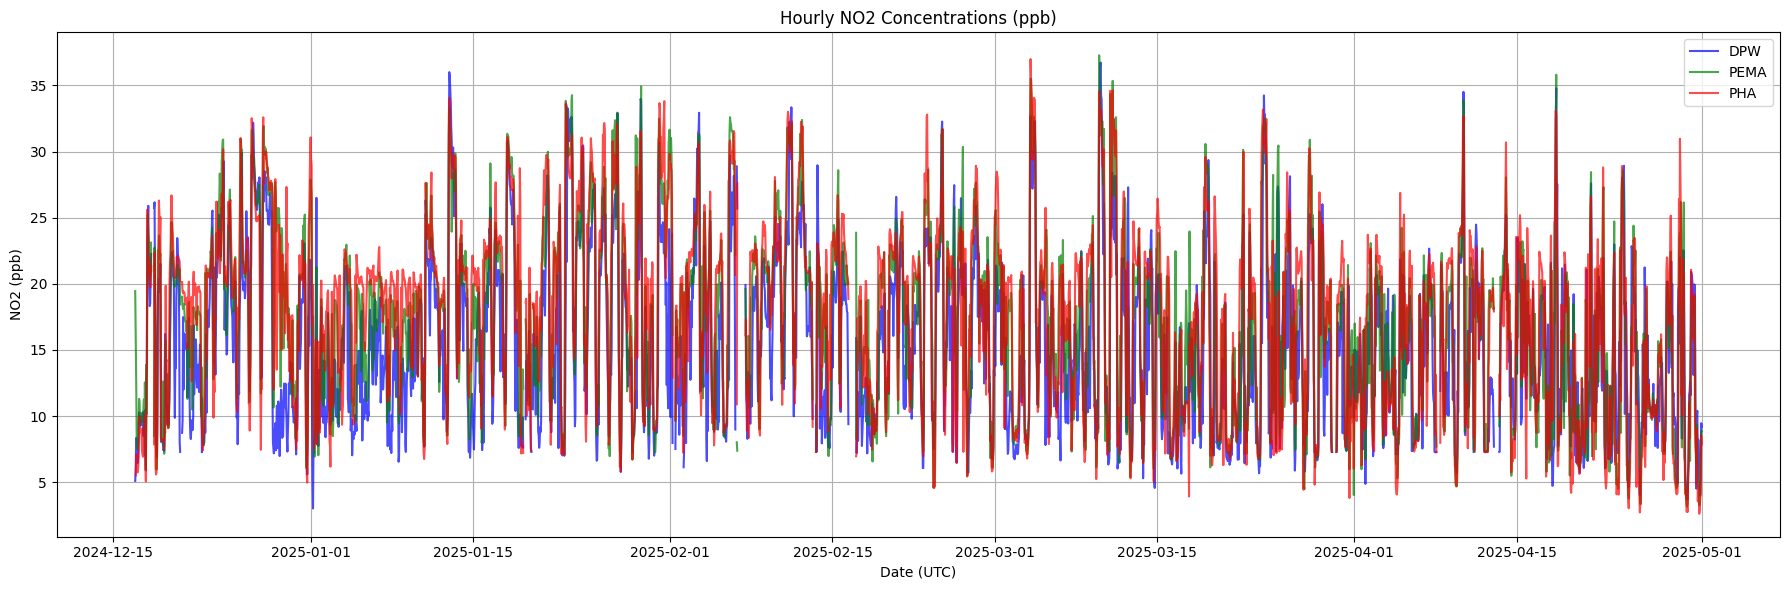

In [9]:
#should probably go back at some point and undo the separation of these. that code was pulled from ozone processing
def prepare_df(df, label):
    df["datetime"] = pd.to_datetime(df["date_utc"] + ' ' + df["time_utc"])
    df = df.set_index("datetime")
    df = df[["no2"]].copy()
    df = df.rename(columns={"no2": label})
    #resample on the hour average
    return df.resample("h").mean() 

#prepare dataframes
dpw_hourly = prepare_df(dpw_df, "DPW")
pema_hourly = prepare_df(pema_df, "PEMA")
pha_hourly = prepare_df(pha_df, "PHA")

merged = pd.concat([dpw_hourly, pema_hourly, pha_hourly], axis=1)
merged.head()

plt.figure(figsize=(18, 6))
plt.plot(merged["DPW"], label="DPW", color="blue", alpha=0.7)
plt.plot(merged["PEMA"], label="PEMA", color="green", alpha=0.7)
plt.plot(merged["PHA"], label="PHA", color="red", alpha=0.7)

plt.title("Hourly NO2 Concentrations (ppb)")
plt.xlabel("Date (UTC)")
plt.ylabel("NO2 (ppb)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RSD threshold: 3.768522843102586
Length of low_rsd_hours: 316
Total Hours: 3155


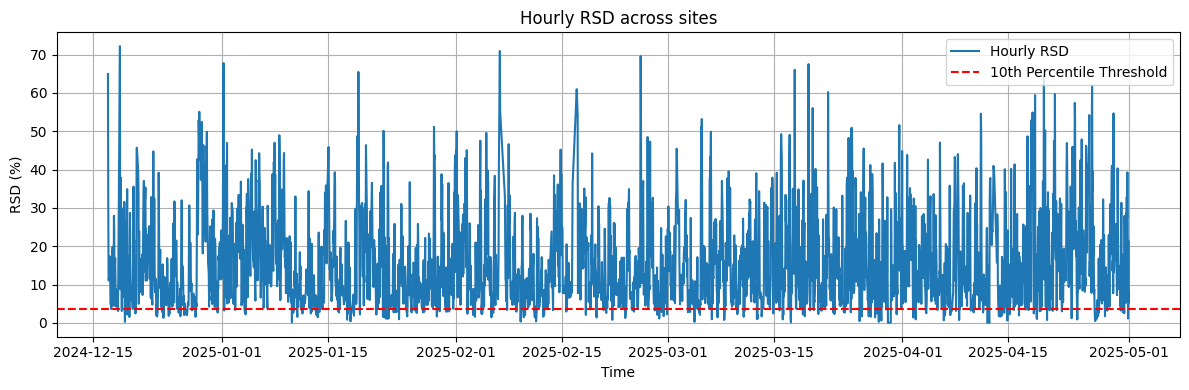

In [10]:
#calculate RSD for each hour
rsd_series = merged.std(axis=1) / merged.mean(axis=1) * 100
merged["RSD"] = rsd_series

#remove missing values
cleaned = merged.dropna(subset=["DPW", "PEMA", "PHA"])

#find tenth percentile threshold
threshold = cleaned["RSD"].quantile(0.10)
print("RSD threshold: " + str(threshold))

#filter for data below this threshold
low_rsd_df = cleaned[cleaned["RSD"] <= threshold]

print("Length of low_rsd_hours: " + str(len(low_rsd_df)))
print("Total Hours: " + str(len(cleaned)))

plt.figure(figsize=(12, 4))
plt.plot(cleaned["RSD"], label="Hourly RSD")
plt.axhline(threshold, color="red", linestyle="--", label="10th Percentile Threshold")
plt.title("Hourly RSD across sites")
plt.xlabel("Time")
plt.ylabel("RSD (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
low_rsd_df.to_csv("low_rsd_hours.csv")
low_rsd_df.head()

,DPW,PEMA,PHA,RSD
datetime,,,,
2024-12-17 08:00:00,9.303783,9.622650,8.927567,3.747423
2024-12-17 09:00:00,9.310283,9.511283,8.856867,3.633409
2024-12-18 06:00:00,22.259556,20.941778,21.340963,3.140890
2024-12-18 18:00:00,6.933700,6.541817,6.883367,3.141839
2024-12-19 04:00:00,8.105196,8.154536,8.134982,0.305548


In [12]:
dpw_df["hour_utc"] = dpw_df["datetime_utc"].dt.floor("h")
dpw_df.head()
low_rsd_df = low_rsd_df.reset_index()
target_hours = set(low_rsd_df["datetime"])

#take only datetimes from the list
dpw_filtered_df = dpw_df[dpw_df["hour_utc"].isin(target_hours)].copy()

#get rid of helper column
dpw_filtered_df.drop(columns=["hour_utc"], inplace=True)
dpw_filtered_df.head()
dpw_filtered_df.to_csv("NO2_DPW_filtered.csv", index=False)

In [13]:
pema_df["hour_utc"] = pema_df["datetime_utc"].dt.floor("h")
pema_df.head()

#take only datetimes from the list
pema_filtered_df = pema_df[pema_df["hour_utc"].isin(target_hours)].copy()

#get rid of helper column
pema_filtered_df.drop(columns=["hour_utc"], inplace=True)
pema_filtered_df.head()
pema_filtered_df.to_csv("NO2_PEMA_filtered.csv", index=False)

In [14]:
pha_df["hour_utc"] = pha_df["datetime_utc"].dt.floor("h")
pha_df.head()

#take only datetimes from the list
pha_filtered_df = pha_df[pha_df["hour_utc"].isin(target_hours)].copy()

#get rid of helper column
pha_filtered_df.drop(columns=["hour_utc"], inplace=True)
pha_filtered_df.head()
pha_filtered_df.to_csv("NO2_PHA_filtered.csv", index=False)

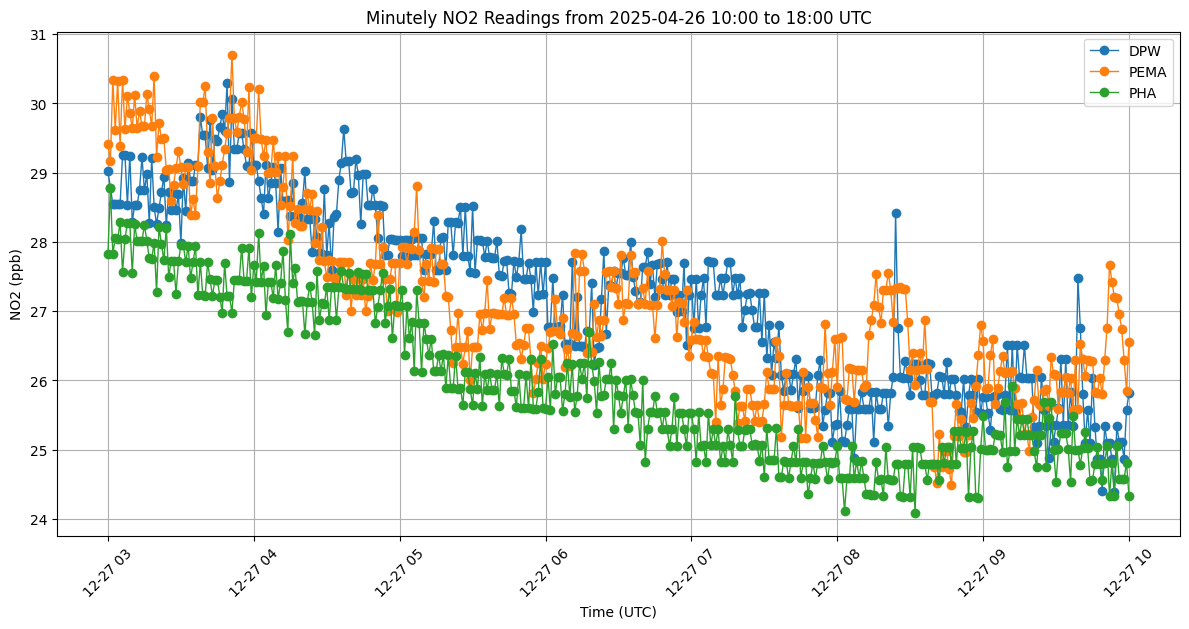

In [15]:
#example minutely visuals of time frames with similar readings
start_time = pd.Timestamp("2024-12-27 03:00:00")
end_time = pd.Timestamp("2024-12-27 10:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-04-26 10:00 to 18:00 UTC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


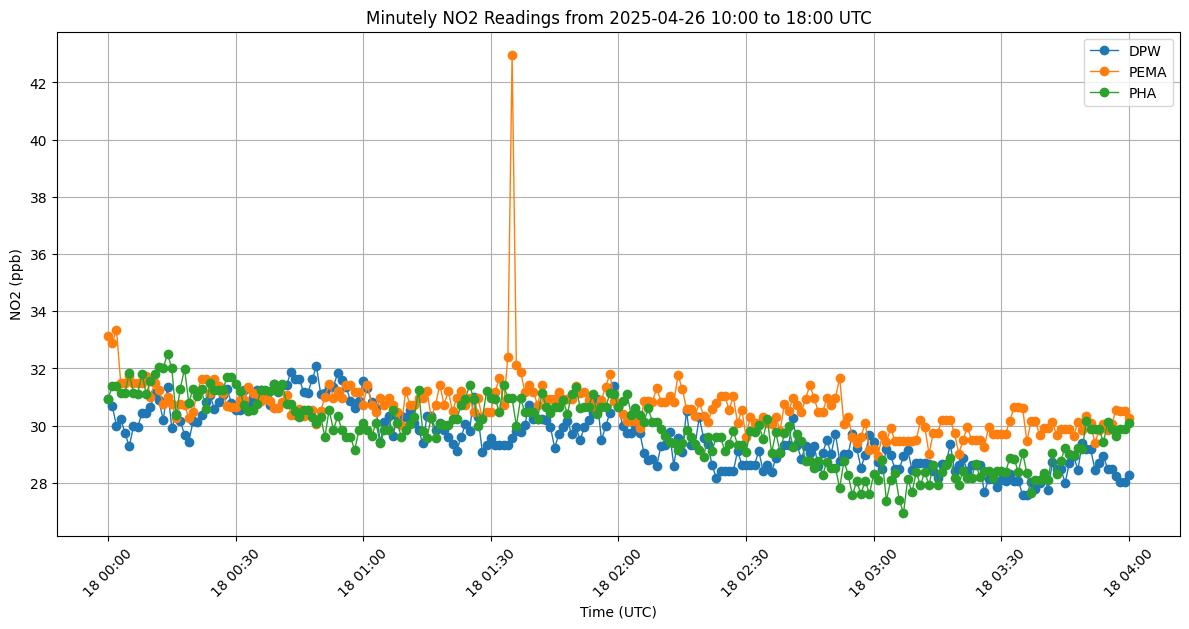

In [16]:
#example minutely visuals of time frames with similar readings
start_time = pd.Timestamp("2025-01-18 00:00:00")
end_time = pd.Timestamp("2025-01-18 04:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-04-26 10:00 to 18:00 UTC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


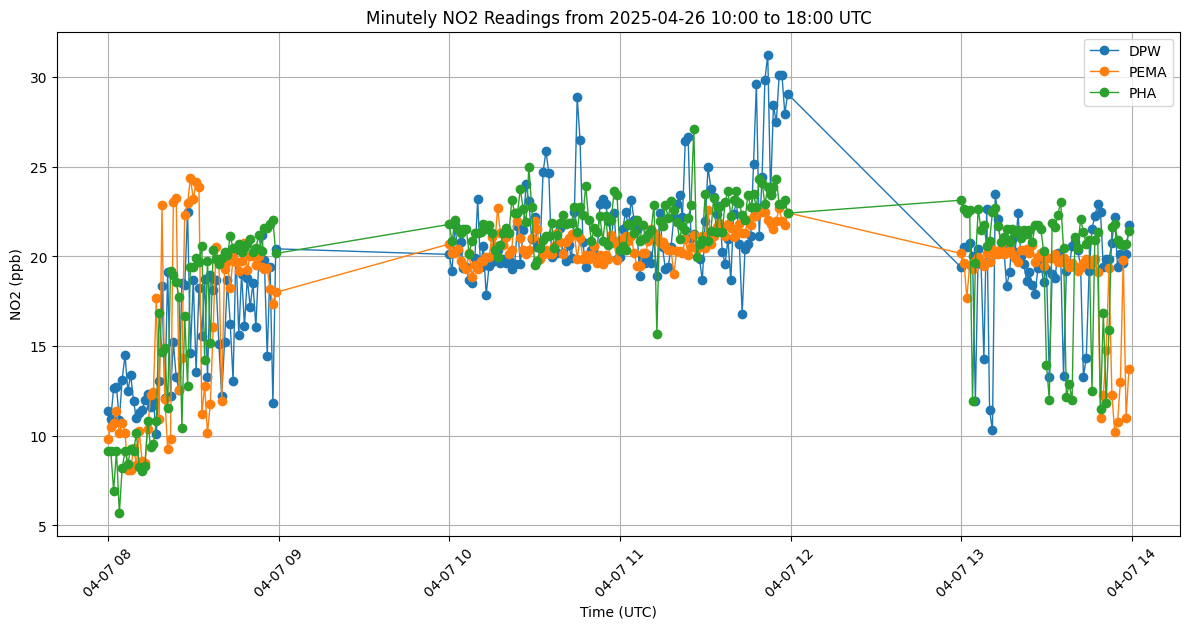

In [17]:
#example minutely visuals of time frames with similar readings
start_time = pd.Timestamp("2025-04-07 08:00:00")
end_time = pd.Timestamp("2025-04-07 14:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-04-26 10:00 to 18:00 UTC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [18]:
#function to explore continous variables in time
def plot_box_and_histogram(column, site, site_string):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    data = site[column].dropna()

    axes[0].boxplot(data)
    boxplot_title = str(column) + " Boxplot at " + str(site_string)
    axes[0].set_title(boxplot_title)
    axes[0].set_ylabel(column)
    

    axes[1].hist(site[column], bins=60, color="skyblue", edgecolor="black")
    histogram_title = str(column) + " Histogram at " + str(site_string)
    axes[1].set_title(histogram_title)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


count    240.000000
mean      19.553183
std        4.018122
min       10.087000
25%       18.634500
50%       19.907000
75%       21.542500
max       31.256000
Name: no2, dtype: float64


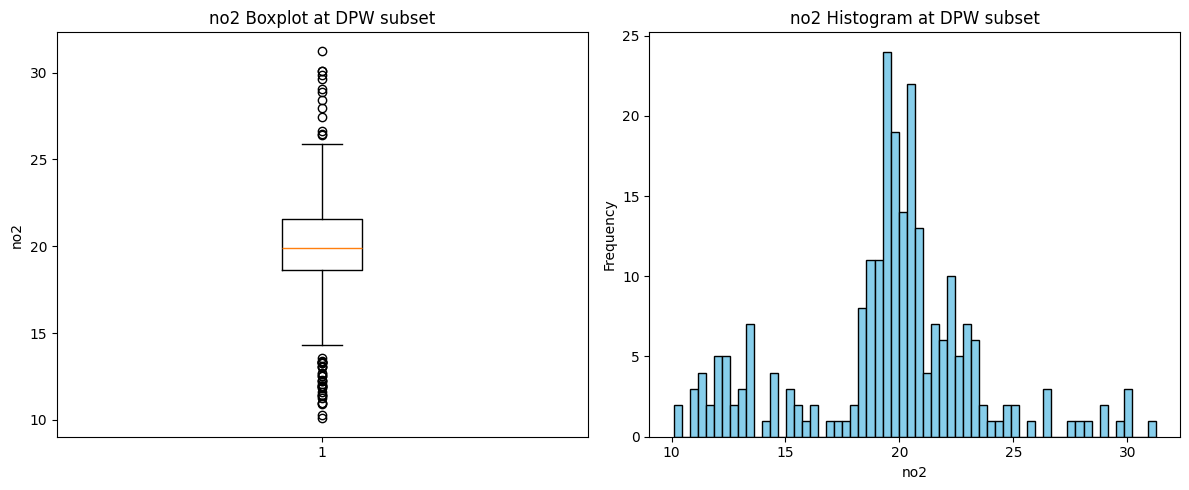

In [19]:
print(dpw_subset["no2"].describe())
plot_box_and_histogram("no2", dpw_subset, "DPW subset")

count    240.000000
mean      19.017125
std        3.670261
min        8.099000
25%       19.419500
50%       20.111500
75%       20.998000
max       24.381000
Name: no2, dtype: float64


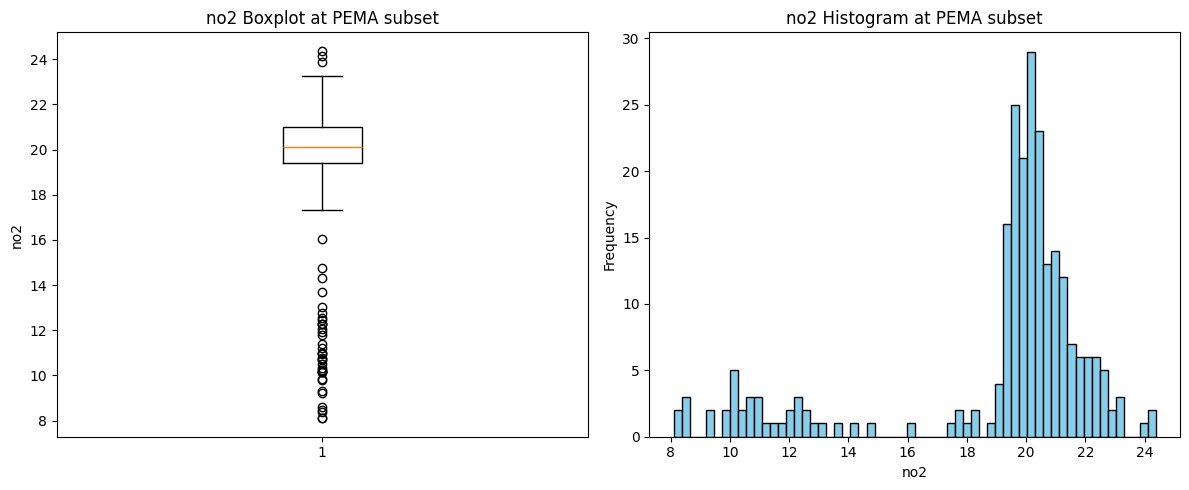

In [20]:
print(pema_subset["no2"].describe())
plot_box_and_histogram("no2", pema_subset, "PEMA subset")

count    240.000000
mean      19.937171
std        4.091595
min        5.691000
25%       20.251000
50%       21.299000
75%       22.047750
max       27.095000
Name: no2, dtype: float64


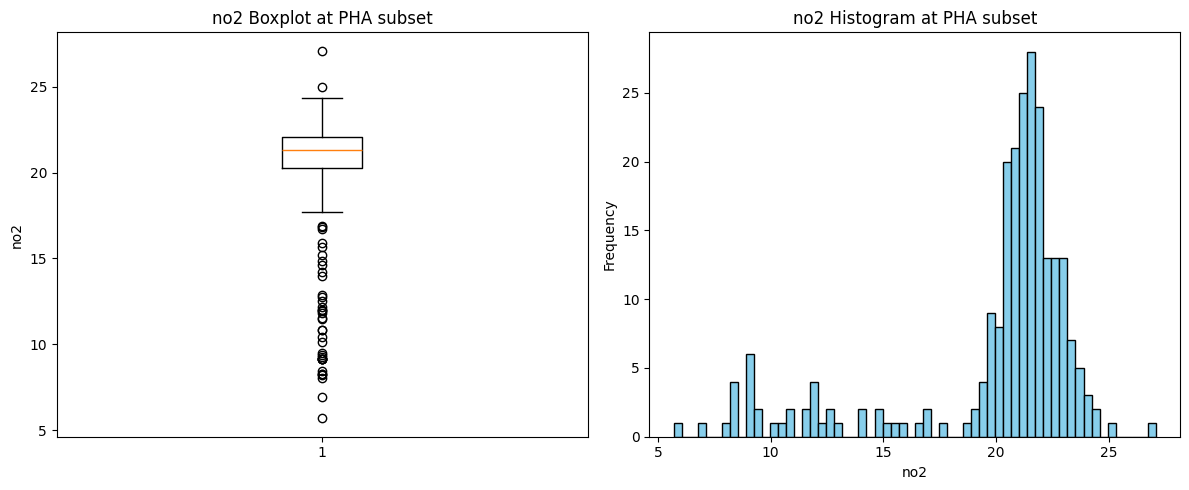

In [21]:
print(pha_subset["no2"].describe())
plot_box_and_histogram("no2", pha_subset, "PHA subset")

In [24]:
dpw_df.head()

,datetime_utc,date_utc,time_utc,date_est,time_est,rh,temp,lat,lon,pm1,pm25,pm10,co,no,no2,o3,no2_rolling_std,flatline_flag,datetime,hour_utc
0,2025-04-30 23:59:00,2025-04-30,23:59:53,2025-04-30,19:59:53,19.2,21.4,41.79521,-71.39783,2.267,2.606,13.212,731.550,2.188,7.695,54.545,NaN,False,2025-04-30 23:59:53,2025-04-30 23:00:00
1,2025-04-30 23:58:00,2025-04-30,23:58:53,2025-04-30,19:58:53,19.4,21.5,41.79521,-71.39783,1.927,2.227,2.461,742.599,1.996,7.744,53.284,NaN,False,2025-04-30 23:58:53,2025-04-30 23:00:00
2,2025-04-30 23:57:00,2025-04-30,23:57:53,2025-04-30,19:57:53,18.7,21.5,41.79521,-71.39783,2.103,2.528,8.526,763.211,2.191,8.391,51.882,NaN,False,2025-04-30 23:57:53,2025-04-30 23:00:00
3,2025-04-30 23:56:00,2025-04-30,23:56:53,2025-04-30,19:56:53,17.7,21.6,41.79521,-71.39783,0.985,1.174,7.518,773.882,2.259,7.459,53.250,NaN,False,2025-04-30 23:56:53,2025-04-30 23:00:00
4,2025-04-30 23:55:00,2025-04-30,23:55:53,2025-04-30,19:55:53,17.3,21.6,41.79521,-71.39783,1.385,1.791,3.087,788.944,2.258,7.971,53.545,0.351939,False,2025-04-30 23:55:53,2025-04-30 23:00:00


In [22]:
def generate_distribution_plots(full_df, filtered_df, site_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    filtered_df["hour"] = filtered_df["datetime_utc"].dt.hour

    #no2 boxplots
    axes[0, 0].boxplot(
        [filtered_df["no2"].dropna(), full_df["no2"].dropna()],
        tick_labels=["Training Data", "All Data"],
        patch_artist=True
    )
    axes[0, 0].set_title("(a) Reference NO₂ Distributions")
    axes[0, 0].set_ylabel("NO₂ (ppb)")

    #temp boxplots
    axes[0, 1].boxplot(
        [filtered_df["temp"].dropna(), full_df["temp"].dropna()],
        tick_labels=["Training Data", "All Data"],
        patch_artist=True
    )
    axes[0, 1].set_title("(b) Temperature Distributions")
    axes[0, 1].set_ylabel("Temperature (°C)")

    #rh boxplots
    axes[1, 0].boxplot(
        [filtered_df["rh"].dropna(), full_df["rh"].dropna()],
        tick_labels=["Training Data", "All Data"],
        patch_artist=True
    )
    axes[1, 0].set_title("(c) RH Distributions")
    axes[1, 0].set_ylabel("RH (%)")

    #hour histogram
    axes[1, 1].hist(filtered_df["hour"], bins=24, edgecolor="black")
    axes[1, 1].set_title("(d) Frequency Distribution of Hours in NO₂ Training Data")
    axes[1, 1].set_xlabel("Hour of Day")
    axes[1, 1].set_ylabel("Frequency")

    plt.suptitle(f"Summary Plots for {site_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_21397/3551824654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["hour"] = filtered_df["datetime_utc"].dt.hour


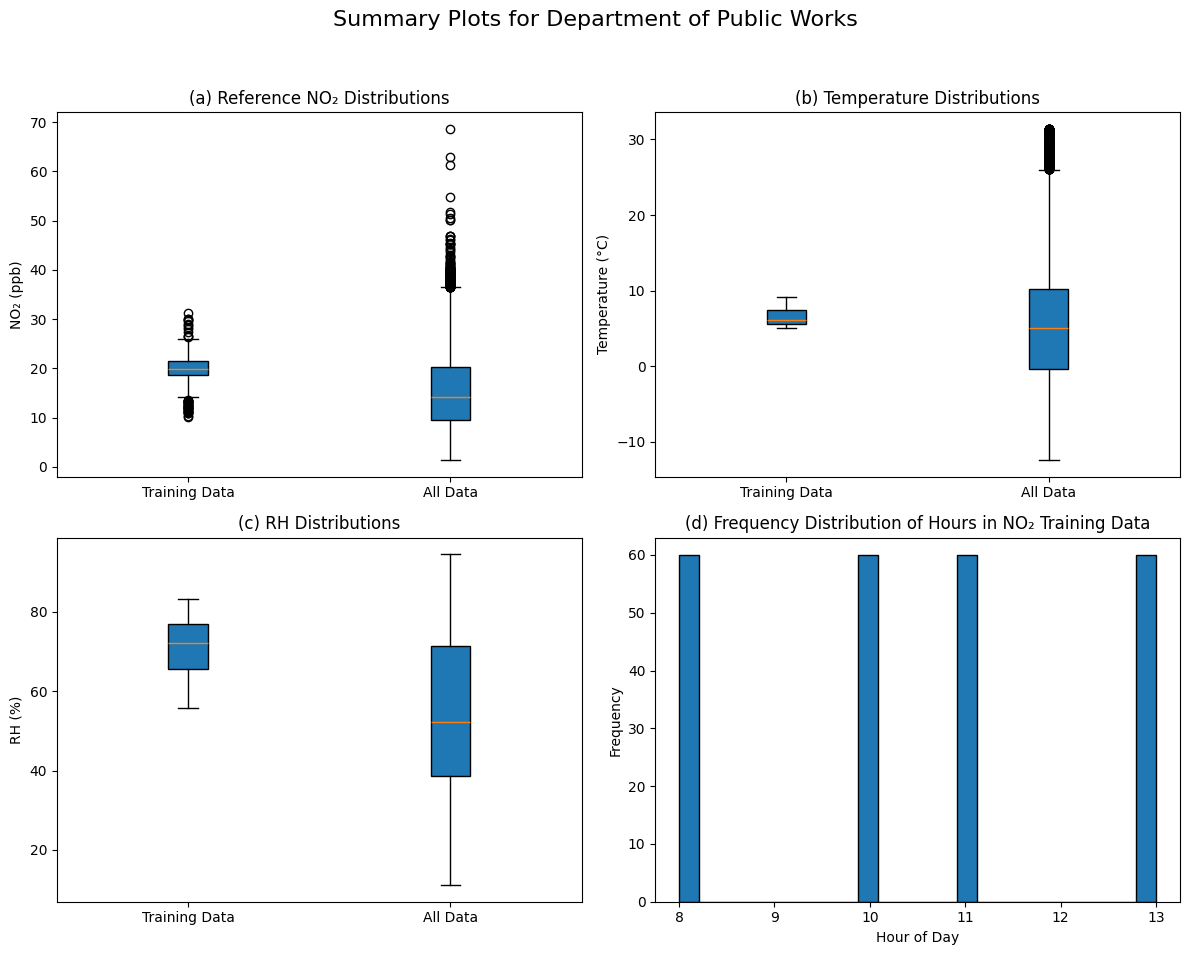

In [25]:
generate_distribution_plots(dpw_df, dpw_subset, "Department of Public Works")

In [ ]:
generate_distribution_plots(dpw_df, dpw_subset, "Department of Public Works")